# Homework 1
 
This homework will explore some basic techniques presented in the first two weeks of the course.
 
You will be invited to experiment with:
 
 1. Co-occurrences
 2. Zipf's law
 2. Naive Bayes classifier
 
 
Fill in the blanks with your own code and see how it works.
 
# 1. Co-occurrences

In [1]:
import nltk
from nltk.corpus import brown

### Vocabulary

Get the list of words of documents in the category `news`.

In [2]:
nltk.download('brown')
brown_news = brown.words(categories='news')
brown_news

[nltk_data] Downloading package brown to /home/matteoni/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Extract the vocabulary and assign an index to each word.

In [238]:
news_vocab = set()
for word in brown_news:
    news_vocab.add(word)
news_vocab

{'inspiring',
 'Carl',
 'preserving',
 'steered',
 'Oklahoma',
 'title',
 'decorative',
 'Thus',
 'onus',
 'clean',
 'bird',
 '6-ounce',
 'basis',
 'pennant',
 'eliminating',
 'peasant',
 'Medical',
 'La',
 'Which',
 'Del',
 'wreath',
 'Zone',
 "wouldn't",
 'tax-exempt',
 'socks',
 'Recounting',
 'Heywood',
 'crowds',
 '85-piece',
 "A.A.U.'s",
 "armory's",
 'nonfiction',
 'Baylor',
 'becomes',
 'Shipley',
 'anti-Colmer',
 'Tims',
 'why',
 'deplored',
 'proved',
 'succeeding',
 'planes',
 'recover',
 'Five',
 'Mac',
 'Columnist',
 'delivery',
 'bat',
 'require',
 'bulge',
 'Missoula',
 'timed',
 'kids',
 'featuring',
 'Milton',
 'Family',
 'reprimanded',
 'builtin',
 'Myers',
 'Anita',
 'fate',
 'indignation',
 "Canada's",
 "Officers'",
 'plaques',
 'Maryland',
 'ace',
 'magistrate',
 'prosecutors',
 'Course',
 'steamship',
 'Stallard',
 'depends',
 "navy's",
 'newlyweds',
 'treat',
 'supplied',
 'Steel',
 '21-year',
 'Home',
 'Sportsman',
 'Armour',
 'Wolcott',
 'weeks',
 'posed',
 'st

In [239]:
news_word_ids = {word:idx for idx, word in enumerate(news_vocab)}
news_word_ids

{'inspiring': 0,
 'Carl': 1,
 'preserving': 2,
 'steered': 3,
 'Oklahoma': 4,
 'title': 5,
 'decorative': 6,
 'Thus': 7,
 'onus': 8,
 'clean': 9,
 'bird': 10,
 '6-ounce': 11,
 'basis': 12,
 'pennant': 13,
 'eliminating': 14,
 'peasant': 15,
 'Medical': 16,
 'La': 17,
 'Which': 18,
 'Del': 19,
 'wreath': 20,
 'Zone': 21,
 "wouldn't": 22,
 'tax-exempt': 23,
 'socks': 24,
 'Recounting': 25,
 'Heywood': 26,
 'crowds': 27,
 '85-piece': 28,
 "A.A.U.'s": 29,
 "armory's": 30,
 'nonfiction': 31,
 'Baylor': 32,
 'becomes': 33,
 'Shipley': 34,
 'anti-Colmer': 35,
 'Tims': 36,
 'why': 37,
 'deplored': 38,
 'proved': 39,
 'succeeding': 40,
 'planes': 41,
 'recover': 42,
 'Five': 43,
 'Mac': 44,
 'Columnist': 45,
 'delivery': 46,
 'bat': 47,
 'require': 48,
 'bulge': 49,
 'Missoula': 50,
 'timed': 51,
 'kids': 52,
 'featuring': 53,
 'Milton': 54,
 'Family': 55,
 'reprimanded': 56,
 'builtin': 57,
 'Myers': 58,
 'Anita': 59,
 'fate': 60,
 'indignation': 61,
 "Canada's": 62,
 "Officers'": 63,
 'plaque

## 1.1 Compute co-occurrence Matrix
Constructs a co-occurrence matrix for a certain window-size $n$ (with a default of
4), considering words $n$ before and $n$ after the word in the center of the window.

In [241]:
import numpy as np

def co_occurrence_matrix(words, word_ids, n=4):
    """
    :param words: a list of words
    :param word_ids: dictionary word -> id
    :param n: size of context
    :return: the matrix of cooccurrences
    """
    M = np.zeros((len(word_ids), len(word_ids)))
    words = list(words)
    for idx, word in enumerate(words):
        """
        leftlimit = max(0, idx-n)
        upto = min(idx, n)
        leftcontext = []
        j = 0
        for a in words.iterate_from(leftlimit):
            if (j == upto): break
            leftcontext.append(a.lower())
            j += 1
        rightcontext = []
        
        j = 0
        upto = min(len(words)-n, n)
        for a in words.iterate_from(idx+1):
            rightcontext.append(a.lower())
            j += 1
            if (j == n): break
        """
        
        leftcontext = []
        for j in range(1, n+1):
            if (idx-j) >= 0: leftcontext.append(words[idx-j])
        
        
        rightcontext = []
        for j in range(1, n+1):
            if (idx+j) < len(word_ids): rightcontext.append(words[idx+j])
                
        context = leftcontext + rightcontext
        idx = word_ids[word]
        for context_word in context:
            M[idx][word_ids[context_word]] += 1
    
    return M

In [242]:
M = co_occurrence_matrix(brown_news, news_word_ids, 5)

### Explore co-occurences

In [236]:
def show_cooccurrences(word_list, word_ids, M):
    """
    :param word_list: the list of words whose co-occurrences to show
    :param word_ids: dictionary assigning ID's to words
    :param M: the co-occurrence matrix
    """
    for word in word_list:
        print(word, end = ": ")
        try:
            idx = word_ids[word]
            occurrences = sorted(M[idx], reverse=True)
            sortedwords = sorted(range(len(M[idx])), key = lambda k : M[idx][k], reverse=True)
            for i, freq in enumerate(occurrences[:10]):
                #corresponding_word = list(word_ids.keys())[list(word_ids.values()).index(sortedwords[i])]
                corresponding_word = list(word_ids.keys())[sortedwords[i]]
                print("\t\"" + corresponding_word + "\" (" + str(int(freq)) + ")")
            print("")
        except KeyError: print("not found in dictionary")

In [175]:
word_list = ['python', 'snake', 'language', 'cobra', 'food', 'bread', 'wine', 'beer',
             'barrels', 'oil', 'energy', 'kuwait', 'revenues', 'profits']

In [243]:
show_cooccurrences(word_list, news_word_ids, M)

python: not found in dictionary
snake: 	"stands" (1)
	"restaurants" (1)
	"souvenir" (1)
	"," (1)
	"and" (1)
	"inspiring" (0)
	"Carl" (0)
	"preserving" (0)
	"steered" (0)
	"Oklahoma" (0)

language: 	"you" (2)
	"," (2)
	"And" (1)
	"science" (1)
	"pure" (1)
	"think" (1)
	"have" (1)
	"and" (1)
	"inspiring" (0)
	"Carl" (0)

cobra: not found in dictionary
food: 	"," (7)
	"a" (4)
	"the" (3)
	"Ramsey" (2)
	"of" (2)
	"SMU's" (2)
	"for" (2)
	"to" (2)
	"." (2)
	"Tech" (1)

bread: 	"a" (1)
	"ring" (1)
	"yeast" (1)
	"," (1)
	"rich" (1)
	"inspiring" (0)
	"Carl" (0)
	"preserving" (0)
	"steered" (0)
	"Oklahoma" (0)

wine: not found in dictionary
beer: 	"a" (2)
	"of" (1)
	"the" (1)
	"such" (1)
	"on" (1)
	"has" (1)
	"drop" (1)
	"run" (1)
	"at" (1)
	"inspiring" (0)

barrels: not found in dictionary
oil: 	"and" (4)
	"the" (2)
	"?" (2)
	"handles" (1)
	"of" (1)
	"sea" (1)
	"made" (1)
	"OK" (1)
	"cost" (1)
	"an" (1)

energy: 	"was" (2)
	"branch" (1)
	"not" (1)
	"any" (1)
	"of" (1)
	"it" (1)
	"the" (1)
	"atom

### Do the same for category ‘hobbies’.

In [245]:
brown_hobbies = brown.words(categories='hobbies')
hobbies_vocab = set()
for word in brown_hobbies:
    hobbies_vocab.add(word)
hobbies_vocab = sorted(hobbies_vocab)
hobbies_vocab

hobbies_word_ids = {word:idx for idx, word in enumerate(hobbies_vocab)}
hobbies_word_ids
M_hobbies = co_occurrence_matrix(brown_hobbies, hobbies_word_ids, 5)

show_cooccurrences(word_list, hobbies_word_ids, M_hobbies)

python: not found in dictionary
snake: not found in dictionary
language: not found in dictionary
cobra: not found in dictionary
food: 	"," (6)
	"and" (4)
	"of" (3)
	"." (2)
	"in" (2)
	"mulch" (2)
	"supplements" (2)
	"that" (2)
	"the" (2)
	"those" (2)

bread: 	"," (2)
	"a" (1)
	"and" (1)
	"drink" (1)
	"garlic" (1)
	"meat" (1)
	"preparing" (1)
	"salad" (1)
	"with" (1)
	"!" (0)

wine: 	"and" (1)
	"complained" (1)
	"of" (1)
	"one" (1)
	"our" (1)
	"relations" (1)
	"solvency" (1)
	"the" (1)
	"white" (1)
	"with" (1)

beer: 	"and" (1)
	"cooler" (1)
	"drinks" (1)
	"earthenware" (1)
	"for" (1)
	"keep" (1)
	"mugs" (1)
	"or" (1)
	"soft" (1)
	"that" (1)

barrels: 	"how" (1)
	"made" (1)
	"out" (1)
	"regulate" (1)
	"revolver" (1)
	"standard-weight" (1)
	"the" (1)
	"to" (1)
	"was" (1)
	"with" (1)

oil: 	"the" (15)
	"," (6)
	"a" (6)
	"of" (6)
	"for" (5)
	"in" (4)
	"." (3)
	"and" (3)
	"to" (3)
	"by" (2)

energy: 	"The" (3)
	"of" (3)
	"!" (2)
	"." (2)
	"the" (2)
	"," (1)
	"400-kc." (1)
	"after" (1)
	"at"

## 1.2 Visualize the Vectors
Projects vectors into two dimensions and use it to plot the rows of the sliced matrix, using the technique of Principal
Component Analysis,

In [164]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def visualize_vectors(words, word_vectors):
    """
    Plot a 2 dimensional visualization of word vectors.
    :param words: the words to visualize
    :param word_vectors: the vectors for those words
    """
    vector_twodim = PCA().fit_transform(word_vectors)[:,:2]
    # show the numerical values of reduced vectors
    for w,v in zip(words, vector_twodim):
        print(w, v)

    plt.figure(figsize=(8,8))
    plt.scatter(vector_twodim[:,0], vector_twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, vector_twodim):
        plt.text(x+0.05, y+0.05, word)

Extract the co-occurrence vectors for a given list of words

In [246]:
def cooccurrence_vectors(word_list, word_ids, M):
    """
    :param word_list: a list of words
    :param word_ids: dictionary of word IDs
    :param M: co-occurrence matrix
    :return: tow results: the vectors for the given words as well as word_list 
    """
    vectors = []
    word_lists = []
    
    for word in word_list:
        if word in word_ids.keys():
            vectors.append(M[word_ids[word]])
            word_lists.append(word)
            
    
    return vectors, word_lists

Visualize the co-occurrence vectors for the given words:

snake [-2.17372852 -0.55969991]
language [-1.70300062 -0.85371737]
food [ 7.89209435 -4.99665275]
bread [-2.00975565 -0.92168506]
beer [-1.72013069 -0.53930267]
oil [-0.73190428  0.99538576]
energy [-2.50456103 -0.06127166]
revenues [4.99035765 6.9285143 ]
profits [-2.03937122  0.00842937]


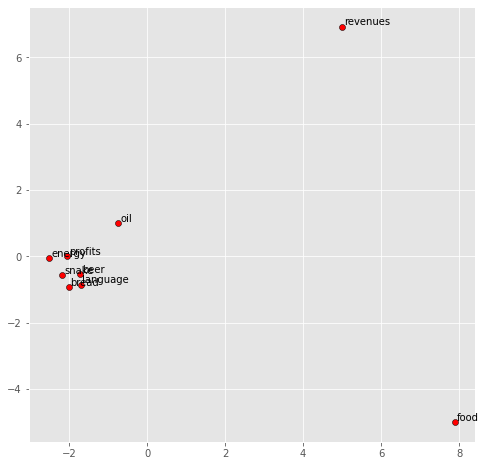

In [247]:
word_vectors, words = cooccurrence_vectors(word_list, news_word_ids, M)
visualize_vectors(words, word_vectors)

snake [1.19264605 8.57074997]
language [-3.3656741  -0.21313375]
food [-3.26341435 -1.15245027]
bread [-3.91794001 -1.07914419]
beer [-3.57305419 -1.46585113]
oil [18.02790331 -1.7755744 ]
energy [-1.52031473 -1.20549801]
revenues [-3.58015199 -1.67909822]


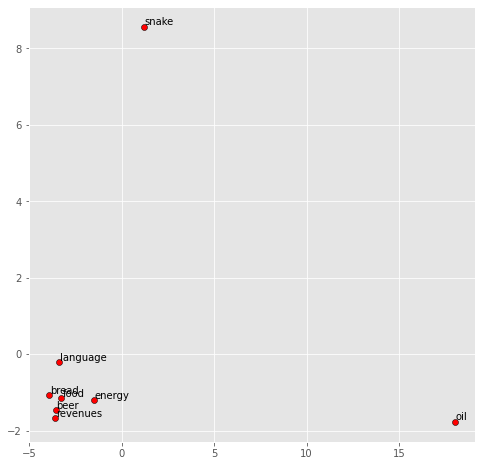

In [248]:
word_vectors, wordsw = cooccurrence_vectors(word_list, hobbies_word_ids, M_hobbies)
visualize_vectors(words, word_vectors)

# 2 Zipf's Law

First define two functions, one to tokenize text from a .txt file and another to extract the vocabulary and compute the number of occurrences of each word.

In [297]:
def tokenize_from_txt(file_name):
    from nltk import word_tokenize
    words = []
    with open(file_name, encoding="utf-8-sig") as file:
        for line in file: words += word_tokenize(line.strip())
    return words

def count_words(words):
    vocab = dict()
    for word in words:
        if word in vocab: vocab[word] += 1
        else: vocab[word] = 1
    return vocab

Extract the vocabulary and the number of occurrences of each word in it and plot the rank. Then fit the power law distribution to the data to extract the exponent alpha of the power law distribution and use it to estimate the exponent beta of the Zipf's law that approsimate the data.
Zipf's law:

$X[r] = C*r^{-\beta}$

where r is the rank and C a constant. The estimation of C should be equal to the number of occurrences in of the most frequent word but it's easy to see that a bigger value is needed to better fit the Zipf's law.

Regardless of the constant C the plot shows that the rank distribution is well approximated by the Zip's law.

You may want to use the package powerlaw to fit the \alpha to the data, from which to compute:
$$\beta = 1/(\alpha - 1)$$

See: https://github.com/jeffalstott/powerlaw.

In [298]:
%matplotlib inline

import matplotlib.pyplot as plt

file_name = '../data/war_and_peace.txt'

# extracting rank distribution of the words
words = tokenize_from_txt(file_name)
word_counts = count_words(words)

In [299]:
ranked = sorted(word_counts.items(), key=lambda elem: elem[1], reverse=True)
ranked_f = [elem[1] for elem in ranked]

Calculating best minimal value for power law fit


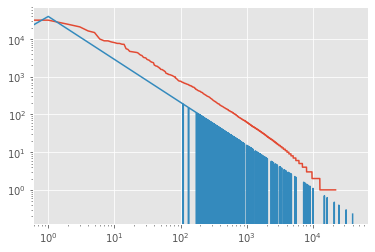

In [300]:
# fitting of the power law distribution and estimation of the exponent of the Zip's law
import powerlaw
res = powerlaw.Fit(ranked_f)
alpha = res.power_law.alpha
beta = 1/(alpha-1)
C = max(ranked_f)
zipf = np.zeros(max(ranked_f)+1)
for rank in ranked_f:
    zipf[rank] = (C * rank ** -beta)

# plot the Zipf's law and the rank distribution on a log-log scale
plt.loglog(ranked_f)
plt.loglog(zipf)

# 3 Naïve Bayes Classifier
We will use the Movie Review dataset from https://www.kaggle.com/pankrzysiu/keras-imdb
It contains 50,000 highly polarized reviews, preprocessed, tokenized, indexed and stored into
numpy arrays.

In [2]:
num_words = 10000
MAX_NUM_WORDS = 10000

from keras.datasets import imdb

Load the training and test set:

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_NUM_WORDS,
                                                     index_from=1)

17473536/17464789 [==============================] - 2s 0us/step


Each document is represented as a list of word IDs, while the output is {0,1} (negative or positive review)

In [4]:
x_train[1], y_train[1]

([1,
  192,
  1151,
  192,
  8253,
  76,
  226,
  3,
  4,
  1461,
  4367,
  5010,
  132,
  24,
  2,
  713,
  6,
  116,
  1632,
  12,
  392,
  18,
  11,
  117,
  952,
  187,
  100,
  3,
  205,
  108,
  3101,
  19,
  12,
  67,
  186,
  6,
  28,
  21,
  5,
  2,
  247,
  124,
  91,
  2,
  112,
  7,
  2298,
  1521,
  3,
  645,
  2,
  114,
  7,
  33,
  8161,
  2,
  227,
  7,
  338,
  1320,
  2,
  116,
  7,
  2,
  128,
  4899,
  17,
  2,
  1000,
  3,
  87,
  27,
  950,
  44,
  35,
  2,
  453,
  7,
  43,
  41,
  36,
  1541,
  1903,
  396,
  2,
  1647,
  24,
  6851,
  3,
  161,
  9,
  3213,
  2,
  2,
  1151,
  7,
  192,
  773,
  5,
  8253,
  2,
  347,
  2635,
  146,
  603,
  2,
  8001,
  13,
  121,
  123,
  66,
  2,
  6851,
  13,
  347,
  163,
  4360,
  96,
  3,
  2,
  226,
  7,
  41,
  2,
  1155,
  13,
  297,
  118,
  3,
  118,
  172,
  9,
  218,
  173,
  134,
  48,
  7,
  4371,
  226,
  8253,
  3,
  2,
  654,
  243,
  2348,
  3,
  2,
  9835,
  129,
  150,
  489,
  16,
  2,
  30,
  7462,
  121

## 3.1 Classifier

The classifier should be implemted as a class with two methods: `train()` and `predict()`.

In [13]:
import numpy as np
from collections import defaultdict

class NBayesClassifier():
    
    def train(self, x_train, y_train):
        """
        :param x_train: an array of list of word IDs
        :param y_train: {0,1} category for the correspoding document
        """
        # compute priors for each category
        positives = np.count_nonzero(y_train)
        p_positive = positives/len(y_train)
        self.P_C = np.array([1-p_positive, p_positive])
        # compute the conditional probabilities for each word/category pair
        counts = np.ones((MAX_NUM_WORDS, 2))
        for words, label in zip(x_train, y_train):
            for word in words: counts[word][label] += 1
        # turn counts into logprob
        probs = np.zeros((MAX_NUM_WORDS, 2))
        for i, cnts in enumerate(counts):
            probs[i][0] = cnts[0]/len(y_train)
            probs[i][1] = cnts[1]/len(y_train)
        self.logprob = np.log(probs)

    def predict(self, x_test):
        """
        :param x_test: an array of list of word IDs
        :return: the predicted class for each document in :param x_test:.
        """
        y_pred = []
        for words in x_test:
            prob = np.log(self.P_C)
            for word in words:
                prob[0] += self.logprob[word][0]
                prob[1] += self.logprob[word][1]
            y_pred.append(np.argmax(prob))
        return np.array(y_pred)

In [14]:
nb_classifier = NBayesClassifier()
nb_classifier.train(x_train, y_train)

## 3.2 Evaluation

In [26]:
def evaluate(y_test, y_pred):
    # compute tp, fp, tn, fn
    true_positives = 0.0
    false_positives = 0.0
    true_negatives = 0.0
    false_negatives = 0.0
    for prediction, truth in zip(y_pred, y_test):
        if (truth == 0 and prediction == 0): true_negatives += 1
        elif (truth == 1 and prediction == 0): false_negatives += 1
        elif (truth == 0 and prediction == 1): false_positives += 1
        elif (truth == 1 and prediction == 1): true_positives += 1
    
    
    accuracy = (true_positives + true_negatives)/(true_positives + false_positives + true_negatives + false_negatives)
    precision = (true_positives)/(true_positives + false_positives)
    recall = (true_positives)/(true_positives + false_negatives)
    F1 = 2*(recall*precision)/(recall+precision)
    print('Accuracy: %.2f %%, Precision:: %.2f %%, Recall: %.2f %%, F1: %.2f %%' % (accuracy, precision, recall, F1))

In [27]:
y_pred = nb_classifier.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.82 %, Precision:: 0.80 %, Recall: 0.87 %, F1: 0.83 %


Compare with an official metrics:

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.81     12500
           1       0.80      0.87      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000

